In [1]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [2]:
 #Read the data as a CSV file
data1 = pd.read_csv(Path('project4data.csv'))
data1.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,DIAGNOSIS_REASON,DIAGNOSIS_LEVEL,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID)
0,01016FD1342018BDC00008,FD,1,10/22/2018,10/17/2018,7/9/2018,post adjudication,7/6/2020,prosecutor,6/13/1986,...,substance-induced/related,Primary,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0
1,01016FD1342018BDC00008,FD,1,10/22/2018,10/17/2018,7/9/2018,post adjudication,7/6/2020,prosecutor,6/13/1986,...,substance-induced/related,NaN,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1
2,01016FD1342018BDC00017,FD,1,10/22/2018,8/8/2018,8/13/2018,probation revocation,11/9/2020,defense attorney,12/31/1988,...,substance-induced/related,Primary,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3
3,01016FD1342018BDC00019,FD,1,11/5/2018,6/1/2018,9/5/2018,post adjudication,7/6/2020,defense attorney,5/29/1989,...,substance-induced/related,Primary,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0
4,01016FD1342018BDC00019,FD,1,11/5/2018,6/1/2018,9/5/2018,post adjudication,7/6/2020,defense attorney,5/29/1989,...,substance-induced/related,NaN,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1


In [3]:
#Convert Data objects to Datetime variables 
data1['ACCEPTANCE_DATE'] = pd.to_datetime(data1['ACCEPTANCE_DATE'])

data1['ARREST_DATE'] = pd.to_datetime(data1['ARREST_DATE'])

data1['REFERRAL_DATE'] = pd.to_datetime(data1['REFERRAL_DATE'])
data1['EXIT_DATE'] = pd.to_datetime(data1['EXIT_DATE'])
data1['DOB'] = pd.to_datetime(data1['DOB'])

In [4]:
 #obtain Age from Date of Birth
# import datetime as dt

now = pd.to_datetime('now')

data1['age'] = (now - data1['DOB']).dt.total_seconds() / (60*60*24*365.25)
data1['age'].describe()

count    4396.000000
mean       38.744214
std        11.713486
min         1.510976
25%        30.279628
50%        37.075658
75%        46.181750
max        81.075658
Name: age, dtype: float64

In [5]:
#Calculate difference in days between arrest to acceptance

data1['time_arrest_accept'] = (data1['ACCEPTANCE_DATE'] - data1['ARREST_DATE']).astype('timedelta64[D]').astype('float')

#data1['time_arrest_accept'] = data1['time_arrest_accept'].dt.day

data1['time_arrest_accept'].describe()

count     4327.000000
mean       243.823434
std        416.706577
min      -7670.000000
25%         58.000000
50%        127.000000
75%        307.000000
max      10141.000000
Name: time_arrest_accept, dtype: float64

In [6]:
#Filter data based on reasonable age and differences between arrest dates and program acceptance
person_data = data1[(data1.age > 15) & (data1.time_arrest_accept > 0)]
person_data.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID),age,time_arrest_accept
0,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0,35.443899,5.0
1,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1,35.443899,5.0
2,01016FD1342018BDC00017,FD,1,2018-10-22,2018-08-08,2018-08-13,probation revocation,2020-11-09,defense attorney,1988-12-31,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3,32.892222,75.0
3,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0,32.484282,157.0
4,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1,32.484282,157.0


In [7]:
#Rename Variables
person_data = person_data.rename(columns={"DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)": 'GRADUATED',
                              "CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)": 'PARTICIPANT_ID', 
                              'SUBSTR(P.PROGRAM_ID,6,2)': 'PROGRAM_TYPE',
                              'COUNT(DISTINCTSI.SANC_INCENT_ID)': 'No_SANC_INCENT',
                              'COUNT(DISTINCTT.TREATMENT_ID)': 'No_TREATMENTS',
                              'COUNT(DISTINCTDT.DRUG_TEST_ID)': 'No_DRUG_TEST',
                              'COUNT(DISTINCTEA.EMP_ASSIST_ID)': 'No_EMP_ASSIST',
                              'COUNT(DISTINCTJS_HEARING_ID)': 'No_HEARING',
                              'age': 'AGE',
                              'time_arrest_accept': 'DAYS_TO_ACCEPTANCE'
                              })
person_data.head()

,PARTICIPANT_ID,PROGRAM_TYPE,GRADUATED,ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,No_SANC_INCENT,No_TREATMENTS,No_DRUG_TEST,No_EMP_ASSIST,No_HEARING,AGE,DAYS_TO_ACCEPTANCE
0,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0,35.443899,5.0
1,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1,35.443899,5.0
2,01016FD1342018BDC00017,FD,1,2018-10-22,2018-08-08,2018-08-13,probation revocation,2020-11-09,defense attorney,1988-12-31,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3,32.892222,75.0
3,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0,32.484282,157.0
4,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1,32.484282,157.0


In [8]:
 #Read the data as a CSV file
EMPLOY_ED = pd.read_csv(Path('emp_educ_income.csv'))
EMPLOY_ED.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)",EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY
0,01034MH147349fbcdf-fff8-43bc-bcf4-e9aec7e414bb,high school/GED,unemployed,No income,Ware
1,01034MH147f6f32042-9eb7-42a4-ba76-2032adff4cdf,high school/GED,part-time more than 20 hours,"$10,000-$14,999",Ware
2,10107FT1027dded030-86bf-49e7-91eb-7a8a2af8a111,high school/GED,full-time,"$15,000-$19,999",Newton
3,09069FT23093b15f5f-9561-42f5-8433-8963dc937626,high school/GED,full-time,"$25,000-$34,999",Hall
4,06031FD112a9de5ae5-de0e-42c8-9e64-dcb708ebf235,some high,full-time,"$15,000-$19,999",Clayton


In [10]:
#load in employment and education data
EMPLOY_ED = EMPLOY_ED.rename(columns={"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)":'PARTICIPANT_ID'})
EMPLOY_ED.head()

,PARTICIPANT_ID,EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY
0,01034MH147349fbcdf-fff8-43bc-bcf4-e9aec7e414bb,high school/GED,unemployed,No income,Ware
1,01034MH147f6f32042-9eb7-42a4-ba76-2032adff4cdf,high school/GED,part-time more than 20 hours,"$10,000-$14,999",Ware
2,10107FT1027dded030-86bf-49e7-91eb-7a8a2af8a111,high school/GED,full-time,"$15,000-$19,999",Newton
3,09069FT23093b15f5f-9561-42f5-8433-8963dc937626,high school/GED,full-time,"$25,000-$34,999",Hall
4,06031FD112a9de5ae5-de0e-42c8-9e64-dcb708ebf235,some high,full-time,"$15,000-$19,999",Clayton


In [11]:
#join the employment with the court and treatment data
joined = person_data.merge(EMPLOY_ED, on='PARTICIPANT_ID', how='inner')
joined.head(10)

,PARTICIPANT_ID,PROGRAM_TYPE,GRADUATED,ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,No_TREATMENTS,No_DRUG_TEST,No_EMP_ASSIST,No_HEARING,AGE,DAYS_TO_ACCEPTANCE,EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY
0,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,1,1,0,0,35.443899,5.0,some high,full-time,No income,Bulloch
1,01016FD1342018BDC00008,FD,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,1986-06-13,...,0,21,0,1,35.443899,5.0,some high,full-time,No income,Bulloch
2,01016FD1342018BDC00017,FD,1,2018-10-22,2018-08-08,2018-08-13,probation revocation,2020-11-09,defense attorney,1988-12-31,...,1,5,0,3,32.892222,75.0,some high,unemployed,No income,Bulloch
3,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,1,0,0,0,32.484282,157.0,some high,full-time,No income,Screven
4,01016FD1342018BDC00019,FD,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,1989-05-29,...,0,6,0,1,32.484282,157.0,some high,full-time,No income,Screven
5,01016FD1342018BDC00022,FD,1,2018-10-31,2018-07-10,2018-08-24,post adjudication,2020-07-06,defense attorney,1971-07-30,...,1,0,0,0,50.315904,113.0,middle,full-time,No income,Effingham
6,01016FD1342018BDC00022,FD,1,2018-10-31,2018-07-10,2018-08-24,post adjudication,2020-07-06,defense attorney,1971-07-30,...,0,4,0,1,50.315904,113.0,middle,full-time,No income,Effingham
7,01016FD1342018BDC00029,FD,1,2018-11-19,2015-06-27,2018-11-05,post adjudication,2020-07-06,treatment provider,1989-07-29,...,2,0,0,0,32.317273,1241.0,some high,full-time,"$20,000-$24,999",Bulloch
8,01016FD1342018BDC00033,FD,1,2018-12-03,2017-08-07,2018-11-08,post adjudication,2020-08-17,defense attorney,1976-04-30,...,3,9,0,3,45.562995,483.0,middle,full-time,No income,Bulloch
9,01016FD1342018SDC00002,FD,0,2018-11-05,2018-09-25,2018-10-30,post adjudication,2020-08-27,defense attorney,1982-06-24,...,1,0,0,4,39.413783,41.0,high school/GED,full-time,"$15,000-$19,999",Screven


In [12]:
#drop irrelevant variables
joined2 = joined.drop(['PARTICIPANT_ID', 'ACCEPTANCE_DATE','ARREST_DATE', 'EXIT_DATE', 'REFERRAL_DATE', 'DOB'], axis=1)
joined2.head()

,PROGRAM_TYPE,GRADUATED,ACCEPTANCE_TYPE,REFERRAL_SOURCE,GENDER,RACE,EMP_UNSTABLE_CHRONIC,DIAGNOSIS_REASON,DIAGNOSIS_LEVEL,EMP_ASSIST_TYPE,...,No_TREATMENTS,No_DRUG_TEST,No_EMP_ASSIST,No_HEARING,AGE,DAYS_TO_ACCEPTANCE,EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY
0,FD,1,post adjudication,prosecutor,male,white,yes,substance-induced/related,Primary,NaN,...,1,1,0,0,35.443899,5.0,some high,full-time,No income,Bulloch
1,FD,1,post adjudication,prosecutor,male,white,yes,substance-induced/related,NaN,NaN,...,0,21,0,1,35.443899,5.0,some high,full-time,No income,Bulloch
2,FD,1,probation revocation,defense attorney,female,black/African American,yes,substance-induced/related,Primary,NaN,...,1,5,0,3,32.892222,75.0,some high,unemployed,No income,Bulloch
3,FD,1,post adjudication,defense attorney,male,white,no,substance-induced/related,Primary,NaN,...,1,0,0,0,32.484282,157.0,some high,full-time,No income,Screven
4,FD,1,post adjudication,defense attorney,male,white,no,substance-induced/related,NaN,NaN,...,0,6,0,1,32.484282,157.0,some high,full-time,No income,Screven


In [13]:
#create features

X = pd.get_dummies(joined2, columns= ['PROGRAM_TYPE', 'ACCEPTANCE_TYPE', 'REFERRAL_SOURCE','GENDER','RACE','EMP_UNSTABLE_CHRONIC',
'DIAGNOSIS_REASON','DIAGNOSIS_LEVEL','EMP_ASSIST_TYPE','PRIMARY_DRUG_CHOICE',
'SECONDARY_DRUG_CHOICE', 'EDUCATION_LEVEL', 'EMP_STATUS', 
'INCOME_LEVEL', 'RESIDENCE_COUNTY']).drop('GRADUATED',axis=1)

y = joined2['GRADUATED']

In [14]:
#shape of the independent variables
print(X.shape)
#shape of the outcome variable
print(y.shape)

(3952, 246)
(3952,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, stratify=y)


In [16]:
#scaling the data by using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RandomForestClassifier
from itertools import combinations
from sklearn.base import clone
from sklearn.metrics import accuracy_score
 
class SequentialForwardSelection():
     
    '''
    Instantiate with Estimator and given number of features
    '''
    def __init__(self, estimator, k_features):
        self.estimator = clone(estimator)
        self.k_features = k_features
         
    '''
    X_train - Training data Pandas dataframe
    X_test - Test data Pandas dataframe
    y_train - Training label Pandas dataframe
    y_test - Test data Pandas dataframe
    '''  
    def fit(self, X_train, X_test, y_train, y_test):
        max_indices = tuple(range(X_train.shape[1]))
        total_features_count = len(max_indices)
        self.subsets_ = []
        self.scores_ = []
        self.indices_ = []
        '''
        Iterate through the feature space to find the first feature
        which gives the maximum model performance
        '''
        scores = []
        subsets = []
        for p in combinations(max_indices, r=1):
                score = self._calc_score(X_train.values, X_test.values, y_train.values, y_test.values, p)
                scores.append(score)
                subsets.append(p)
        #
        # Find the single feature having best score
        #
        best_score_index = np.argmax(scores)
        self.scores_.append(scores[best_score_index])
        self.indices_ = list(subsets[best_score_index])
        self.subsets_.append(self.indices_)
         
        #
        # Add a feature one by one until k_features is reached
        #
        dim = 1
        while dim < self.k_features:
            scores = []
            subsets = []
            current_feature = dim
            '''
            Add the remaining features one-by-one from the remaining feature set
            Calculate the score for every feature combinations
            '''
            idx = 0
            while idx < total_features_count:
                if idx not in self.indices_:
                    indices = list(self.indices_)
                    indices.append(idx)
                    score = self._calc_score(X_train.values, X_test.values, y_train.values, y_test.values,indices)
                    scores.append(score)
                    subsets.append(indices)
                idx += 1
             
            #
            # Get the index of best score
            #
            best_score_index = np.argmax(scores)
            #
            # Record the best score
            #
            self.scores_.append(scores[best_score_index])
            #
            # Get the indices of features which gave best score
            #
            self.indices_ = list(subsets[best_score_index])
            #
            # Record the indices of features for best score
            #
            self.subsets_.append(self.indices_)
             
            dim += 1
             
        self.k_score_ = self.scores_[-1]
     
    '''
    Transform training, test data set to the data set
    havng features which gave best score
    '''
    def transform(self, X):
        return X.values[:, self.indices_]
     
    '''
    Train models with specific set of features
    indices - indices of features
    '''
    def _calc_score(self, X_train, X_test, y_train, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train.ravel())
        y_pred = self.estimator.predict(X_test[:, indices])
        score = accuracy_score(y_test, y_pred)
        return score

In [58]:
#
# Instantiate the estimator - LogisticRegression
#
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
#
# Number of features
#
k_features = 20
#
# Instantiate SequentialBackwardSearch
#
sfs = SequentialForwardSelection(rf_model, k_features)
#
# Fit the data to determine the k_features which give the
# most optimal model performance
#
sfs.fit(X_train, X_test, y_train, y_test)
#
# Transform the training data set to dataset having k_features
# giving most optimal model performance
#
X_train_sfs = sfs.transform(X_train)
#
# Transform the test data set to dataset having k_features
#
X_test_sfs = sfs.transform(X_test)

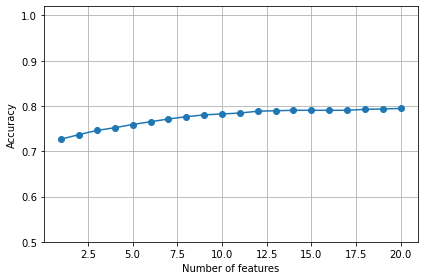

In [59]:
k_features = [len(k) for k in sfs.subsets_]
plt.plot(k_features, sfs.scores_, marker='o')
plt.ylim([0.5, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2964 but corresponding boolean dimension is 246